In [16]:
# ==== CELL 1: Imports and settings ====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", message="Glyph 8209")

sns.set(style="whitegrid")
%matplotlib inline


In [10]:
# ==== CELL 2: Load dataset ====
df = pd.read_csv("titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# ==== CELL 3: Basic info & summary ====
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nSummary statistics:")
print(df.describe(include='all'))


Shape: (891, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary statistics:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN       

In [4]:
# ==== CELL 4: Check missing values ====
print("Missing values per column:")
print(df.isnull().sum().sort_values(ascending=False))


Missing values per column:
Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64


In [18]:
# ==== CELL 5: Basic cleaning / simple transformations ====

# Example: fill missing Age with median
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Fill missing Embarked with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Optionally drop columns with too many missing values (e.g. Cabin, Ticket — if you choose)
df_clean = df.drop(columns=['Cabin', 'Ticket'])

df_clean.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [19]:
# ==== CELL 6: Add useful derived columns ====

# Example: create a column for family size
df_clean['FamilySize'] = df_clean['SibSp'] + df_clean['Parch'] + 1

# Age group categories
df_clean['AgeGroup'] = pd.cut(df_clean['Age'],
                              bins=[0, 12, 18, 40, 60, np.inf],
                              labels=['Child', 'Teen', 'Adult', 'Middle‑aged', 'Senior'])

df_clean.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Adult


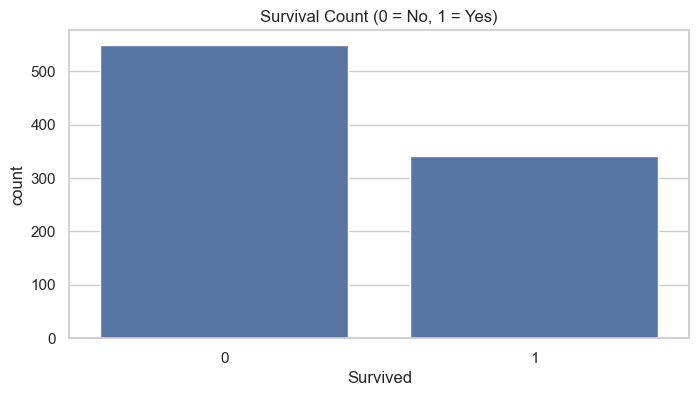

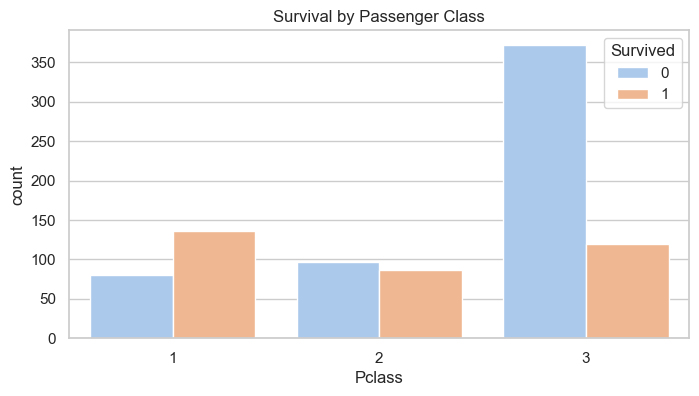

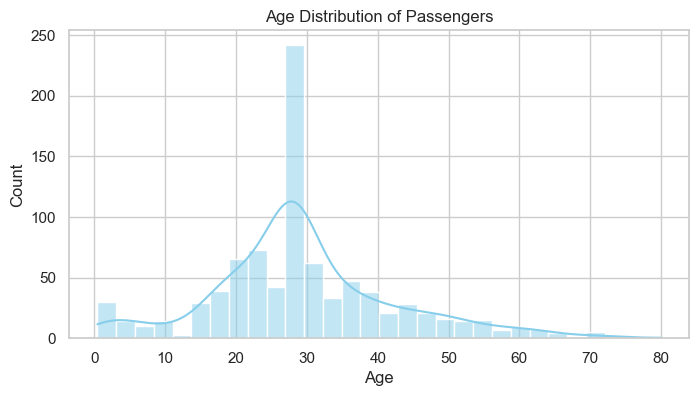

In [20]:
# ==== CELL 7: Exploratory Visualizations ====

plt.figure(figsize=(8,4))
sns.countplot(x='Survived', data=df_clean)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x='Pclass', hue='Survived', data=df_clean, palette='pastel')
plt.title("Survival by Passenger Class")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df_clean['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


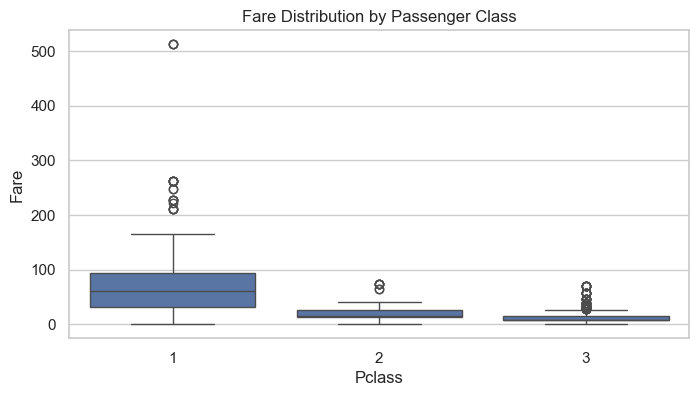

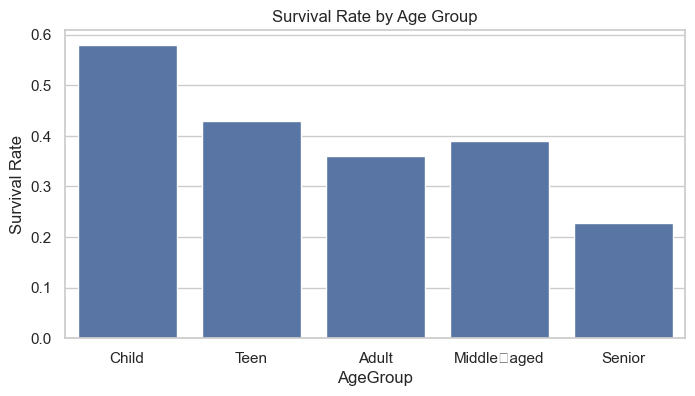

In [21]:
# ==== CELL 8: More Visualizations ====

plt.figure(figsize=(8,4))
sns.boxplot(x='Pclass', y='Fare', data=df_clean)
plt.title("Fare Distribution by Passenger Class")
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x='AgeGroup', y='Survived', data=df_clean, errorbar=None, estimator=lambda x: sum(x)/len(x))
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.show()


In [22]:
# ==== CELL 9: Analysis & insight examples ====
print("Average fare paid:", df_clean['Fare'].mean())
print("Average family size:", df_clean['FamilySize'].mean())

print("\nSurvival rate by sex:")
print(df_clean.groupby('Sex')['Survived'].mean())

print("\nSurvival rate by passenger class:")
print(df_clean.groupby('Pclass')['Survived'].mean())


Average fare paid: 32.204207968574636
Average family size: 1.904601571268238

Survival rate by sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by passenger class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [23]:
# ==== CELL 10: Save cleaned data and figures (optional) ====
df_clean.to_csv("titanic_cleaned.csv", index=False)

# Example: saving one figure
plt.figure(figsize=(8,4))
sns.countplot(x='Survived', data=df_clean)
plt.title("Survival Count")
plt.savefig("survival_count.png")
plt.close()
